# Визуализация кривых обучения при разных batch_size в ходе обучения модели wordchar2vector

In [16]:
from __future__ import print_function
import random
import codecs
import itertools
import os
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
from utils.tokenizer import Tokenizer
%matplotlib inline

### Списки файлов с историей обучения, сохраненных тренером модели

In [17]:
# результаты получены при выполнении скрипта https://github.com/Koziev/chatbot/blob/master/scripts/train_wordchar2vector.sh
# с разным --batch_size
#
# сами файлы лежат в ../tmp

fn_1000 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=1000_seed=123456.csv',
           'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=1000_seed=234567.csv']

fn_950 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=950_seed=10025980.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=950_seed=20025980.csv']

fn_900 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=900_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=900_seed=30025980.csv']

fn_850 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=850_seed=10025980.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=850_seed=20025980.csv']

fn_800 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=800_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=800_seed=30025980.csv']

fn_750 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=750_seed=10025980.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=750_seed=20025980.csv']

fn_700 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=700_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=700_seed=30025980.csv']

fn_650 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=650_seed=456789.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=650_seed=20025980.csv']

fn_600 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=600_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=600_seed=30025980.csv']

fn_550 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=550_seed=456789.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=550_seed=20025980.csv']

fn_500 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=500_seed=123456.csv']

fn_450 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=450_seed=456789.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=450_seed=20025980.csv']

fn_400 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=400_seed=123456.csv']

fn_350 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=350_seed=456789.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=350_seed=20025980.csv']

fn_300 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=300_seed=123456.csv']

fn_270 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=270_seed=123456.csv']

fn_250 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=250_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=250_seed=654321.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=250_seed=654321_1.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=250_seed=456789.csv']

fn_220 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=220_seed=123456.csv']

fn_200 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=200_seed=123456.csv',
          'learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=200_seed=234567.csv']

fn_180 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=180_seed=123456.csv']

fn_150 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=150_seed=123456.csv']

fn_140 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=140_seed=123456.csv']

fn_100 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=100_seed=123456.csv']

fn_50 = ['learning_curve__lstm(cnn)_vecsize=56_tunable_char_embeddings=0_chardims=87_batchsize=50_seed=123456.csv']

all_fns = list(itertools.chain(fn_1000, fn_950, fn_900, fn_850, fn_800, fn_750, fn_700, fn_650, fn_600, fn_550, fn_500, fn_450,
                               fn_400, fn_350, fn_300, fn_270, fn_250,
                               fn_220, fn_200, fn_180, fn_150, fn_140, fn_100, fn_50))


### Получаем среднее, дисперсию и "абсолютную ошибку измерения"

In [18]:
def calc_curve( dataframe_fnames ):
    """
    Усреднение кривых обучения, загружаемых из csv-файлов в списке.
    """
    # Коэф. Стьюдента для данного кол-ва кривых при дов. вероятности 0.95
    t = stats.t.ppf(1-0.025, len(dataframe_fnames))

    # Получим среднее и дисперсию для кривых обучения в заданном наборе
    # датафреймов
    nbx = 1000000
    ox = []
    for fn in dataframe_fnames:
        df = pd.read_csv(os.path.join(u'../tmp', fn), header=None, encoding='utf-8', delimiter='\t', index_col=None)
        x = df[0].values
        if len(x) < nbx:
            nbx = len(x)
            ox = x

    v = np.zeros( (nbx, len(dataframe_fnames)) )
    for i, fn in enumerate(dataframe_fnames):
        df = pd.read_csv(os.path.join(u'../tmp', fn), header=None, encoding='utf-8', delimiter='\t', index_col=None)
        v[:, i] = df[1].values[:nbx]

    mean = np.mean(v, axis=1)
    std = np.std(v, axis=1)
    dev = std * t /math.sqrt(len(dataframe_fnames))

    return (ox, mean, std, dev)

In [19]:
nb_samples = 40000

ox_1000, mean_1000, std_1000, dev_1000 = calc_curve(fn_1000)
ox_500, mean_500, std_500, dev_500 = calc_curve(fn_500)
ox_300, mean_300, std_300, dev_300 = calc_curve(fn_300)
ox_270, mean_270, std_270, dev_270 = calc_curve(fn_270)
ox_250, mean_250, std_250, dev_250 = calc_curve(fn_250)
ox_220, mean_220, std_220, dev_220 = calc_curve(fn_220)
ox_200, mean_200, std_200, dev_200 = calc_curve(fn_200)
ox_180, mean_180, std_180, dev_180 = calc_curve(fn_180)
ox_150, mean_150, std_150, dev_150 = calc_curve(fn_150)
ox_100, mean_100, std_100, dev_100 = calc_curve(fn_100)

mean_curves = [(100, mean_100),
               (150, mean_150),
               (180, mean_180),
               (200, mean_200),
               (220, mean_220),
               (250, mean_250),
               (300, mean_300),
               (500, mean_500),
               (1000, mean_1000)]

### Динамика обучения для двух разных batch_size относительно кол-ва градиентов с отложенными ошибками измерения

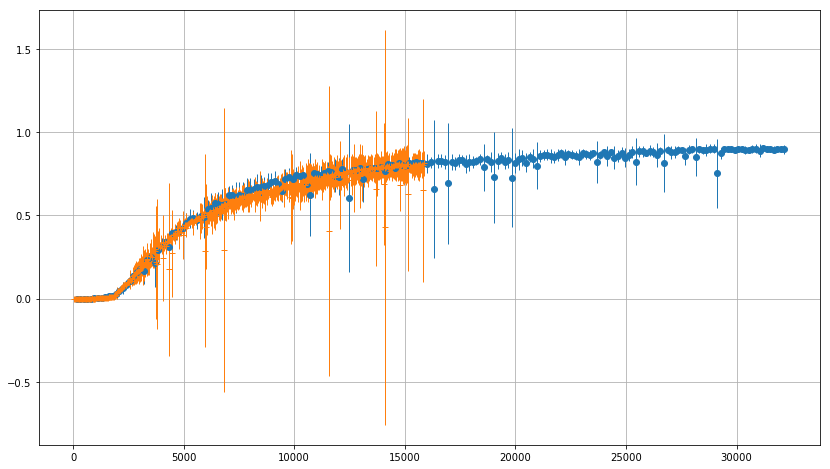

In [20]:
plt.figure(figsize=(14, 8))

#ax = plt.gca()
#ax.locator_params(nbins=20)

plt.grid(True)
plt.errorbar(ox_250*nb_samples/250.0, mean_250, yerr=dev_250, fmt='o', linewidth=1, label='250')
plt.errorbar(ox_1000*nb_samples/1000.0, mean_1000, yerr=dev_1000, fmt='+', linewidth=1, label='1000')
plt.show()

# Рисуем усредненные кривые обучения

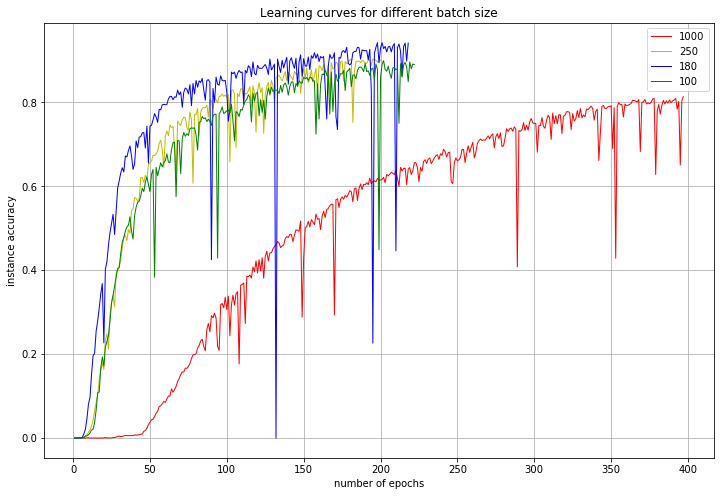

In [21]:
# Вариант, когда по OX откладываем число эпох
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot(ox_1000, mean_1000, 'r-', linewidth=1, label='1000')
plt.plot(ox_250, mean_250, 'y-', linewidth=1, label='250')
plt.plot(ox_180, mean_180, 'b-', linewidth=1, label='180')
plt.plot(ox_100, mean_100, 'g-', linewidth=1, label='100')
plt.xlabel('number of epochs')
plt.ylabel('instance accuracy')
plt.title('Learning curves for different batch size')
plt.legend()

### Вариант, когда по OX откладываем число батчей, то есть сколько раз выполнялось обратное распространение ошибки.

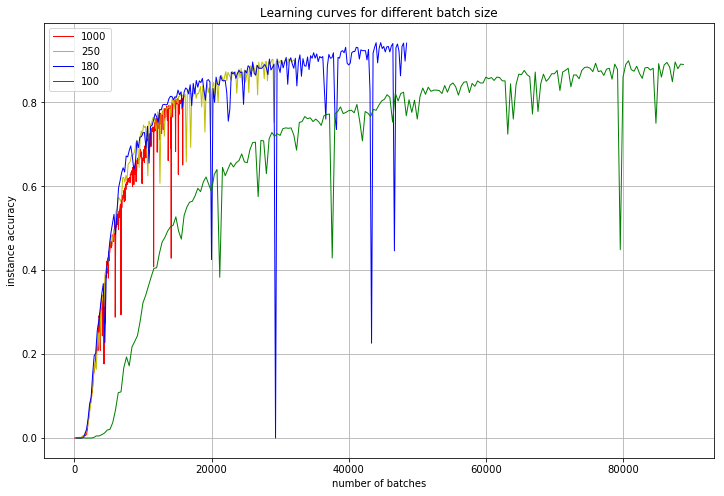

In [22]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.plot(ox_1000/1000.*nb_samples, mean_1000, 'r-', linewidth=1, label='1000')
plt.plot(ox_250/250.*nb_samples, mean_250, 'y-', linewidth=1, label='250')
plt.plot(ox_180/180.*nb_samples, mean_180, 'b-', linewidth=1, label='180')
plt.plot(ox_100/100.*nb_samples, mean_100, 'g-', linewidth=1, label='100')
plt.xlabel('number of batches')
plt.ylabel('instance accuracy')
plt.title('Learning curves for different batch size')
plt.legend()

## Зависимость максимальной точности модели от batch_size

In [23]:
import re

def find_max_accuracy(dataframe_filename):
    df = pd.read_csv(os.path.join(u'../tmp', dataframe_filename), header=None, encoding='utf-8', delimiter='\t', index_col=None)
    max_acc = np.amax(df[1].values)
    batchsize = int(re.search('_batchsize\\=([0-9]+)_', dataframe_filename).group(1))
    return (batchsize, max_acc)

In [24]:
x_batch_size = []
y_accuracy = []
for filename in all_fns:
    batch_size, max_accur = find_max_accuracy(filename)
    x_batch_size.append(batch_size)
    y_accuracy.append(max_accur)

### Добавим на график квадратичную регрессию

In [25]:
import numpy as np

p2 = np.polyfit(x=x_batch_size, y=y_accuracy, deg=2)

x = x_batch_size  #np.arange(0, 1050, step=50)
y = np.polyval(p2, x)

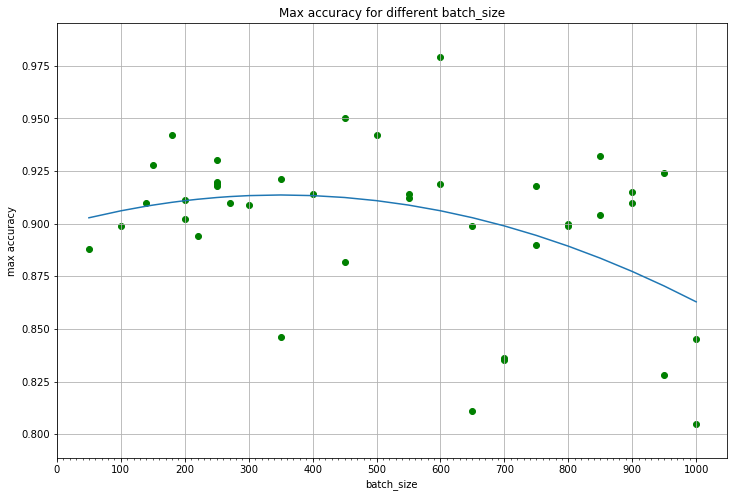

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

plt.grid(True)
plt.scatter(x_batch_size, y_accuracy, color='green', marker='o')

plt.plot(x, y)  # параболическая регрессия

plt.xlabel('batch_size')
plt.ylabel('max accuracy')
plt.title('Max accuracy for different batch_size')

major_ticks = np.arange(0, 1001, 100)
minor_ticks = np.arange(0, 1001, 10)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.show()

### Насколько хорошо эта парабола приближает распределение?

In [27]:
# Получим отклонения реальных значений от результатов аппроксимации в этой точке и
# посмотрим на гистограмму. В идеальном случае она должна быть симметричной
deltas = (y - y_accuracy)
h_hist, h_bins  = np.histogram(deltas, bins=10)
print(h_hist)
print(h_bins)

[ 1  2  6  8 13  3  2  1  3  1]
[-0.07289754 -0.05642786 -0.03995818 -0.02348851 -0.00701883  0.00945084
  0.02592052  0.0423902   0.05885987  0.07532955  0.09179922]


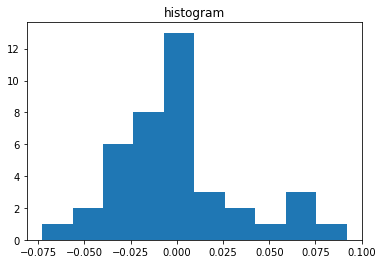

In [28]:
# Гистограмма показывает, что отклонения несимметричны, видимо нужно повысить порядок
# приближающего полинома. Но для нашей ограниченной выборки это ничего хорошего не даст.
plt.hist(deltas)
plt.title("histogram") 
plt.show()

## Есть ли значимая линейная корреляция между batch_size и max accuracy?

In [29]:
import scipy.stats

# Используем коэффициент корреляции Пирсона
px = scipy.stats.pearsonr(x_batch_size, y_accuracy)
pearson_coeff = px[0]
print('Pearson correlation coefficient={}'.format(pearson_coeff))

# Получается по модулю около 0.5, то есть о четкой линейной регрессии говорить нельзя

Pearson correlation coefficient=-0.344510402018


## Есть ли монотонная зависимость?


In [30]:
import scipy.stats.mstats

# используем коэффициент Спирмена (https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
sx = scipy.stats.mstats.spearmanr(x_batch_size, y_accuracy)
print(sx.correlation)
# Монотонной зависимости тоже нет, и аппроксимация параболой это наглядно подтверждает.

-0.245196180265
